In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('7_Daegu_Real_Estate_data.csv')
data.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


* **SalePrice**: Giá bán tính bằng đơn vị US dollar (target feature).
* **YearBuilt**: Năm xây dựng.
* **YrSold**: Năm bán.
* **MonthSold**: Tháng bán.
* **Size(sqf)**: Kích thước của căn hộ tính bằng đơn vị $feet^2$.
* **Floor**: Số tầng của căn hộ.
* **HallwayType**: Loại phòng trước.
* **HeatingType**: Loại lò sưởi.
* **AptManageType**: Loại hình thức quản lý của căn hộ.
* **N_Parkinglot(Ground)**: Số chỗ đỗ xe ở tầng trệt.
* **N_Parkinglot(Basement)**: Số chỗ đỗ xe dưới tầng hầm.
* **TimeToBusStop**: Thời gian di chuyển từ căn hộ đến trạm xe buýt (categorical).
* **TimeToSubway**: Thời gian di chuyển từ căn hộ đến ga tàu điện ngầm (categorical).
* **N_APT**: Số toà nhà trong khu chung cư.
* **N_manager**: Số người quản lý các tiện ích tại căn hộ (ví dụ như an ninh, vệ sinh,...).
* **N_elevators**: Tổng số thang máy trong một khu chung cư.
* **SubwayStation**: Tên của ga tàu điện ngầm gần căn hộ.
* **N_FacilitiesNearBy(PublicOffice)**: Số lượng văn phòng công cộng gần căn hộ.
* **N_FacilitiesNearBy(Hospital)**: Số lượng bệnh viện gần căn hộ.
* **N_FacilitiesNearBy(Dpartmentstore)**: Số lượng cửa hàng bách hoá gần căn hộ.
* **N_FacilitiesNearBy(Mall)**: Số lượng trung tâm mua sắm gần căn hộ.
* **N_FacilitiesNearBy(ETC)**: 
* **N_FacilitiesNearBy(Park)**: Số lượng công viên gần căn hộ.
* **N_SchoolNearBy(Elementary)**: Số lượng trường tiểu học gần căn hộ.
* **N_SchoolNearBy(Middle)**: Số lượng trường trung học cơ sở gần căn hộ.
* **N_SchoolNearBy(High)**: Số lượng trường trung học phổ thông gần căn hộ.
* **N_SchoolNearBy(University)**: Số lượng trường đại học gần căn hộ
* **N_FacilitiesInApt**: Số lượng tiện ích cho người ở chung cư (ví dụ như hồ bơi, phòng gym, sân chơi ngoài trời,...).
* **N_FacilitiesNearBy(Total)**: Tổng số tiện ích gần căn hộ.
* **N_SchoolNearBy(Total)**: Tổng số trường học gần căn hộ.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,5891.0,221218.112545,106384.186446,32743.0,144247.0,207964.0,291150.0,585840.0
YearBuilt,5891.0,2002.967408,8.811782,1978.0,1993.0,2006.0,2008.0,2015.0
YrSold,5891.0,2012.691563,2.905488,2007.0,2010.0,2013.0,2015.0,2017.0
MonthSold,5891.0,6.160244,3.387752,1.0,3.0,6.0,9.0,12.0
Size(sqf),5891.0,955.569173,382.464050,135.0,644.0,910.0,1149.0,2337.0
Floor,5891.0,12.026311,7.548743,1.0,6.0,11.0,17.0,43.0
N_Parkinglot(Ground),5891.0,195.883551,218.597210,0.0,11.0,100.0,249.0,713.0
N_Parkinglot(Basement),5891.0,570.761670,408.621075,0.0,184.0,536.0,798.0,1321.0
N_APT,5891.0,5.613648,2.811831,1.0,3.0,7.0,8.0,13.0
N_manager,5891.0,6.310304,3.174088,1.0,5.0,6.0,8.0,14.0


In [5]:
data.describe(include='O').T

,count,unique,top,freq
HallwayType,5891,3,terraced,3564
HeatingType,5891,2,individual_heating,5591
AptManageType,5891,2,management_in_trust,5542
TimeToBusStop,5891,3,0~5min,4509
TimeToSubway,5891,5,0-5min,2759
SubwayStation,5891,8,Kyungbuk_uni_hospital,1644


In [6]:
data.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [7]:
# function to divide data by data type
def div_cols(data):
    data_division = {'number': [], 'string': []}
    for i in data.columns:
        # Numeric data
        if data[i].dtype=='int64':
            data_division['number'].append(i)
        elif data[i].dtype=='float64':
            data_division['number'].append(i)
        # Categorical data
        else:
            data_division['string'].append(i)
    return data_division

# divide data
data_division = div_cols(data)
print(">> Number of numerical features: ", len(data_division['number']))
print(">> Number of categorical features: ", len(data_division['string']))

>> Number of numerical features:  24
>> Number of categorical features:  6


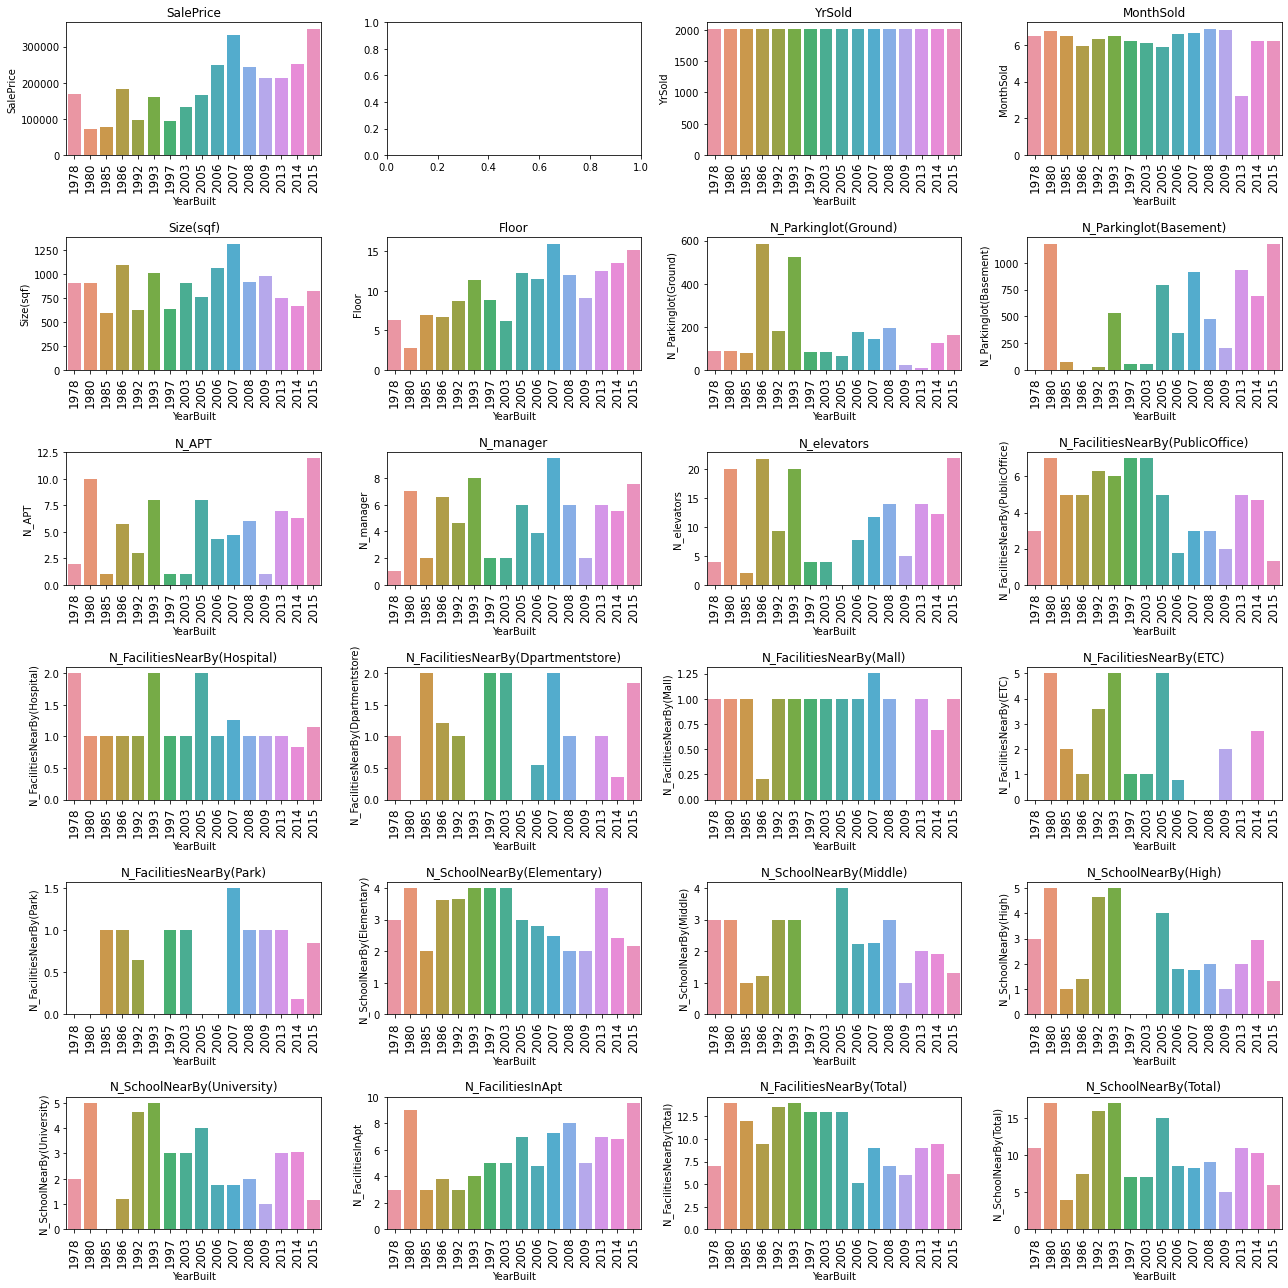

In [8]:
f, ax = plt.subplots(ncols = 4, nrows = 6, figsize=(18,18))
for i, c in zip(ax.flatten(), data_division['number']):
    if c != 'YearBuilt':
        temp_data = data.groupby(['YearBuilt'])[[c]].mean().reset_index()
        sns.barplot(x="YearBuilt", y=c, data=temp_data, ci=None, ax=i)
        i.tick_params(axis='x', labelrotation = 90, labelsize = 12)
        i.title.set_text(c)
f.tight_layout()
plt.show()

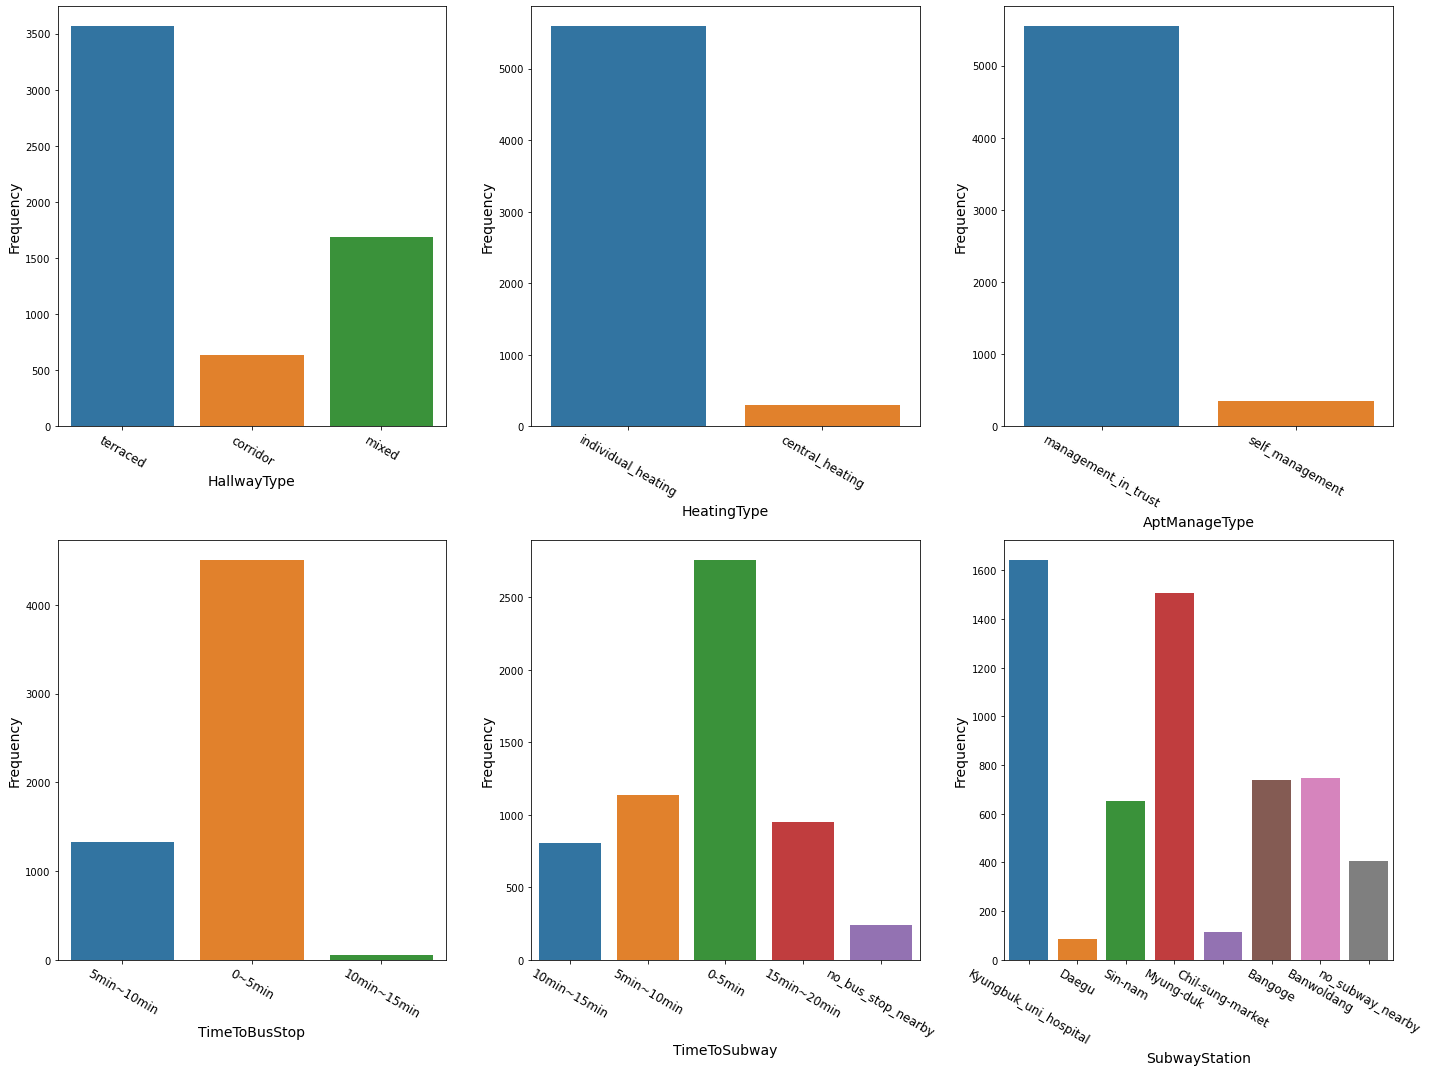

In [9]:
f, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,15))
for i, c in zip(ax.flatten(), data_division['string']):
    sns.countplot(x=c, data=data, ax=i)
    i.tick_params(axis='x', labelrotation = -30, labelsize = 12)
    i.set_xlabel(c, fontsize = 14)
    i.set_ylabel('Frequency', fontsize = 14)
f.tight_layout()
plt.show()

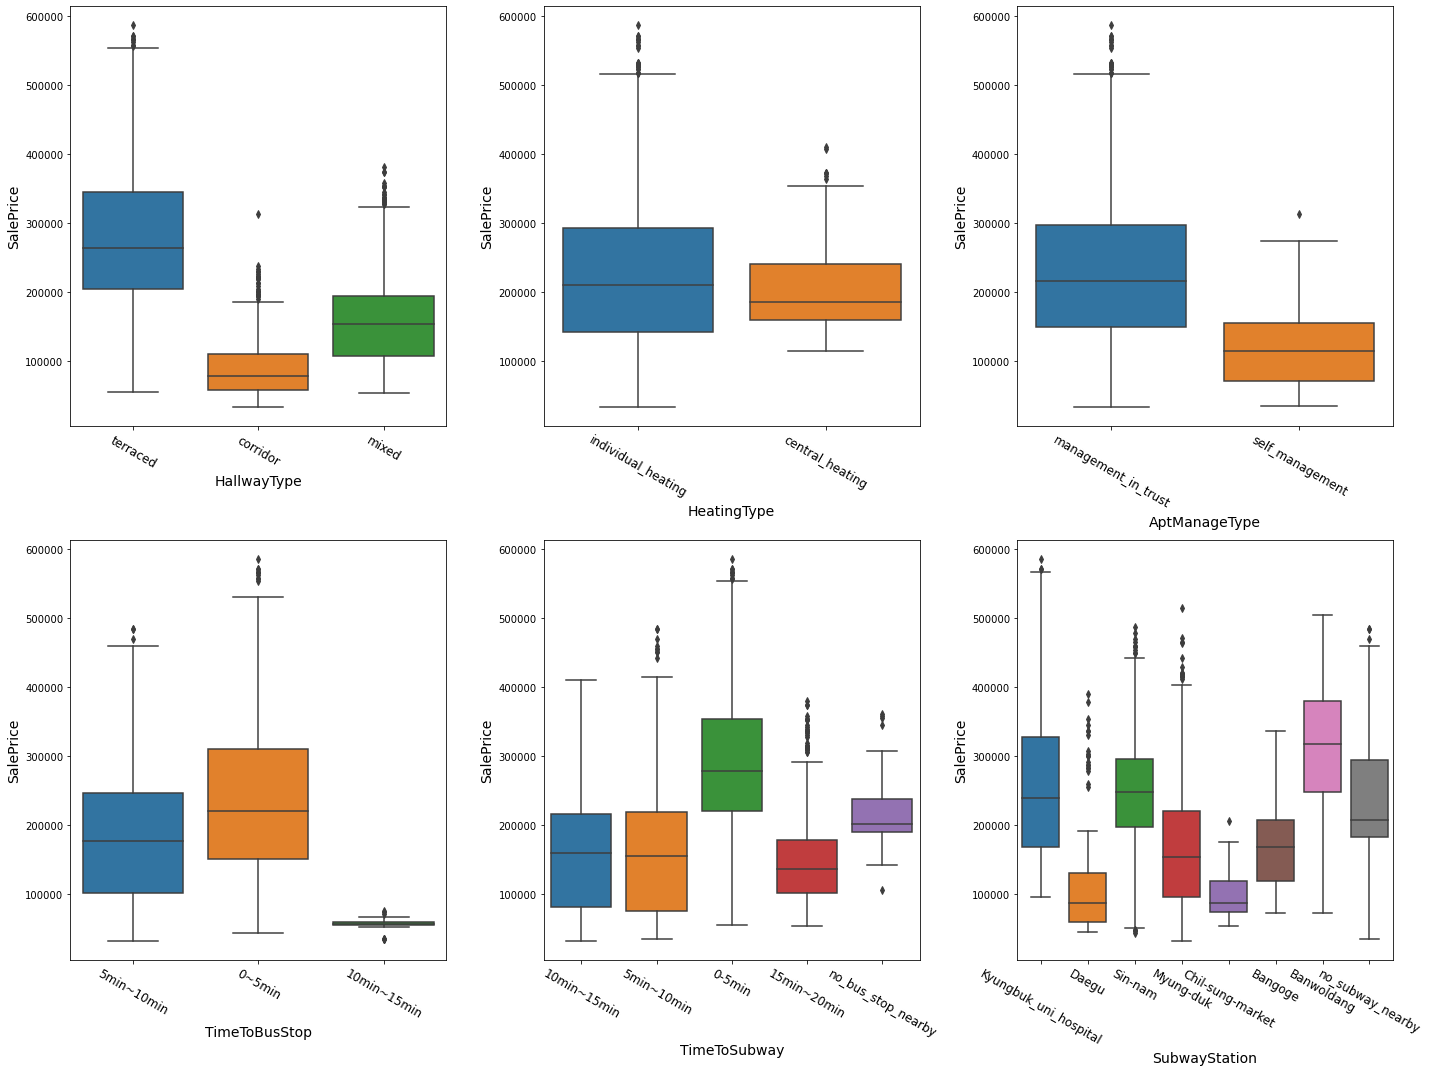

In [10]:
f, ax = plt.subplots(ncols = 3, nrows = 2, figsize=(20,15))
for i, c in zip(ax.flatten(), data_division['string']):
    sns.boxplot(x=c, y='SalePrice', data=data, ax = i)
    i.tick_params(axis='x', labelrotation = -30, labelsize = 12)
    i.set_xlabel(c, fontsize = 14)
    i.set_ylabel('SalePrice', fontsize = 14)
f.tight_layout()
plt.show()

In [11]:
# correlation between Price
data.corr()['SalePrice']

SalePrice                             1.000000
YearBuilt                             0.447875
YrSold                                0.357682
MonthSold                             0.081924
Size(sqf)                             0.697199
Floor                                 0.336729
N_Parkinglot(Ground)                 -0.130549
N_Parkinglot(Basement)                0.473252
N_APT                                 0.162684
N_manager                             0.358329
N_elevators                           0.208248
N_FacilitiesNearBy(PublicOffice)     -0.462234
N_FacilitiesNearBy(Hospital)         -0.257282
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_FacilitiesNearBy(Mall)              0.082979
N_FacilitiesNearBy(ETC)              -0.442299
N_FacilitiesNearBy(Park)              0.310906
N_SchoolNearBy(Elementary)           -0.341186
N_SchoolNearBy(Middle)               -0.166439
N_SchoolNearBy(High)                 -0.371840
N_SchoolNearBy(University)           -0.403080
N_FacilitiesI

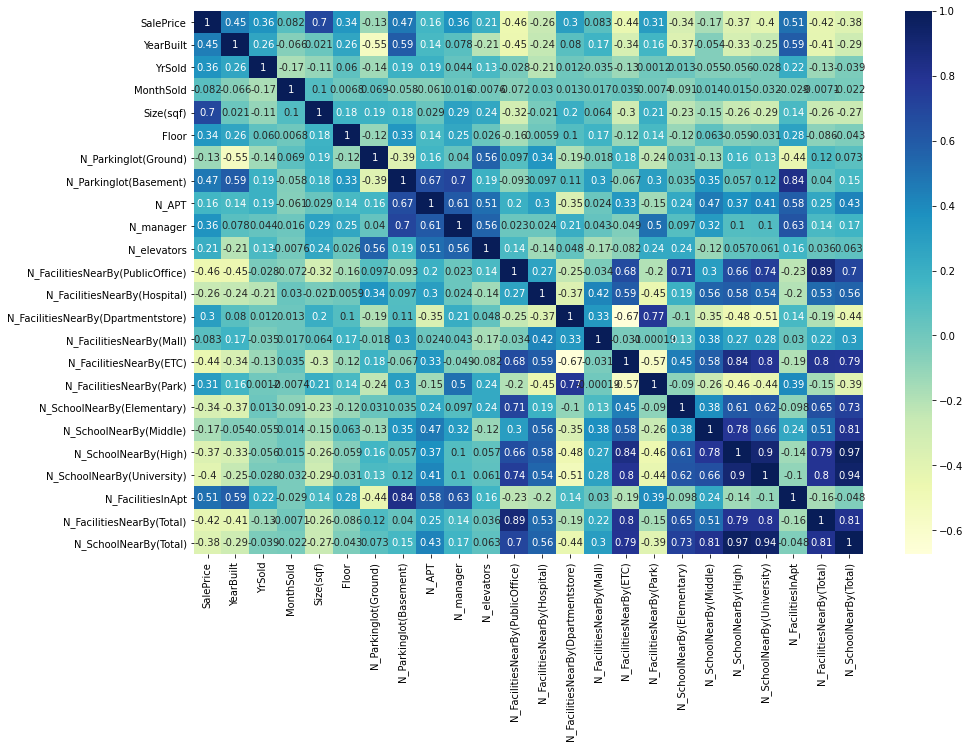

In [12]:
# correlation heatmap

plt.subplots(figsize=(15,10))
corr = data.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

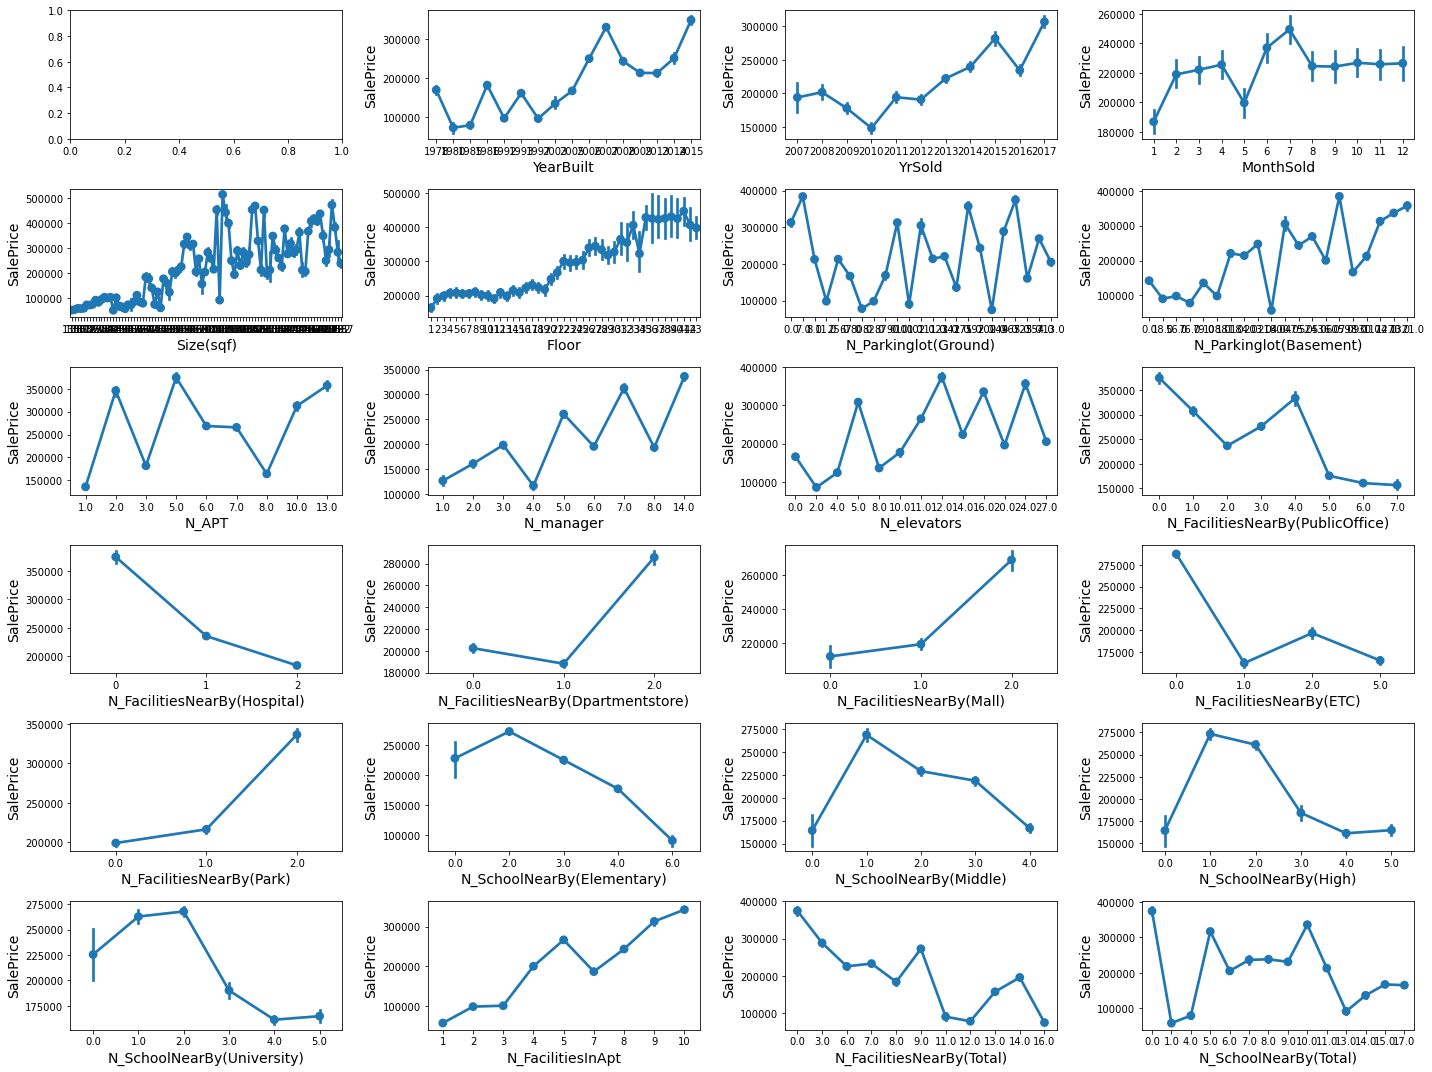

In [13]:
f, ax = plt.subplots(ncols = 4, nrows = 6, figsize=(20,15))
for i, c in zip(ax.flatten(), data_division['number']):
    if c != 'SalePrice':
        sns.pointplot(x=c, y='SalePrice', data=data, ax=i)
        i.set_xlabel(c, fontsize = 14)
        i.set_ylabel('SalePrice', fontsize = 14)
f.tight_layout()
plt.show()

In [14]:
from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
from pathlib import Path
from ipywidgets import interact

In [15]:
output_notebook()

Loading BokehJS ...

In [17]:
# data['DateSold'] = data.apply(lambda row: datetime(
#                               row['YrSold'], row['MonthSold'], 1), axis=1)
# data = data.drop(columns = ['Month'])
# data.head()

In [18]:
data.index = data.YearBuilt
data.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),DateSold
YearBuilt,,,,,,,,,,,,,,,,,,,,,
2006,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0,2007-08-01
1985,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0,2007-08-01
1985,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0,2007-08-01
2006,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0,2007-08-01
1993,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0,2007-08-01


In [19]:
dates = np.array(data['YearBuilt'], dtype=np.int64)
source = ColumnDataSource(data=dict(date=dates, high=data['SalePrice']))

In [20]:
p = figure(title="Time Series Stock Data for Daegu Real Estate", plot_height=300, plot_width=800,
           x_range=(dates[1000], dates[1800]), x_axis_location="above", x_axis_type="datetime", 
           tools="xpan", toolbar_location=None,
           background_fill_color="#ffefef")

p.yaxis.axis_label = 'Sale Price for Month'
r = p.line('date', 'high', source=source)

In [ ]:
select = figure(title="Drag To See More Data",plot_width=800, y_range=p.y_range,
                x_axis_type="datetime", y_axis_type=None, plot_height=130,
                tools="", background_fill_color="#ffefef", toolbar_location=None,)

range_tool = RangeTool(x_range=p.x_range)
range_tool.overlay.fill_color = "green"
range_tool.overlay.fill_alpha = 0.2

In [ ]:
select.line('date', 'high', source=source)
select.ygrid.grid_line_color = None
select.add_tools(range_tool)
select.toolbar.active_multi = range_tool
show(column(p, select), notebook_handle=True)